<a href="https://colab.research.google.com/github/Ved-Prakash2002/100-Days-of-Code/blob/main/Space_Race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Analyse and Visualize the Space Race*




*In this project, I analyzed a **dataset** of over **4,300 space missions** conducted by organizations worldwide to uncover trends, insights, and actionable findings. This analysis demonstrates my proficiency in the complete **data science workflow**, from **data cleaning** and **preprocessing** to advanced analysis, **visualization**, and **predictive modeling**.*

*By exploring key aspects such as *mission success rates*, **cost trends**, **rocket reliability**, and **regional performance**, I crafted a detailed narrative supported by compelling visualizations and quantitative metrics.*

*The project showcases my ability to handle complex, real-world datasets, highlighting critical skills expected in a data science role:*

1.  ***Data Cleaning and Preprocessing***: *I managed inconsistent datetime formats, missing values in the Price column, and redundant features, ensuring the dataset was ready for in-depth analysis. I employed techniques such as mean/median imputation and predictive modeling to address missing data effectively.*

2.  ***Exploratory Data Analysis (EDA)***: *Through careful examination of launch activity trends, success rates, and regional contributions, I identified patterns that offer meaningful insights. I visualized these findings using libraries like Matplotlib, Seaborn, and Plotly, creating interactive, recruiter-ready dashboards.*

3.  ***Statistical and Geospatial Analysis***: *I quantified relationships between key variables such as rocket status and mission success, applying correlation analysis and hypothesis testing to validate findings. Additionally, I conducted geospatial analysis to visualize mission success rates across continents, leveraging tools like Plotly for scattergeo visualizations.*

4.  ***Predictive Modeling***: *To demonstrate my machine learning capabilities, I developed a classification model to predict mission success based on features such as rocket status, organization, and cost. This model highlights my expertise in feature engineering, algorithm selection, and evaluation using metrics like precision and recall.*

5.  ***Professional Communication***: *The results of this analysis were translated into a clear, interactive story, including dashboards and visualizations tailored to non-technical audiences. These outputs emphasize my ability to transform complex datasets into actionable insights.*

***Phase 1: Problem Definition and Goal Setting***

*Phase 1 focuses on framing the objectives of the analysis and aligning them with the expectations of data science roles.*


1. ***Understanding the Dataset:*** *The dataset comprised over 4,300 records of space missions, including key attributes like mission success rates, launch costs, rocket statuses, and geographical launch locations.*


2. ***Defining Clear Objectives:***
*   *Analyzing trends in launch activities over time to uncover year-on-year growth and seasonality.*
*   *Exploring factors influencing mission success rates across organizations, locations, and rocket statuses.*
*   *Investigating cost trends and their implications for organizational decision-making.*
*   *Developing a predictive model to determine the likelihood of mission success based on relevant features.*

***Phase 2: Data Understanding and Preprocessing***

*Phase 2 of this project focuses on understanding the structure, quality, and challenges of the dataset, followed by robust preprocessing to prepare the data for analysis.*

***Data Overview***

*Loading the dataset from a CSV file **(mission_launches.csv)** into a Pandas DataFrame to perform an initial exploratory check.*

*It displays the first few rows, provides a summary of the dataset's structure, generates descriptive statistics for numerical columns, and identifies the number of missing values in each column.*

In [ ]:
import pandas as pd

df = pd.read_csv("mission_launches.csv")   # Load the dataset
df.head()   # Display first few rows of the dataset
df.info()   # Summary of the dataset
df.describe()   # Statistical summary of numerical columns
df.isnull().sum()   # Count missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


***Data Cleaning***

*Removing unnecessary columns **(Unnamed: 0.1 and Unnamed: 0)** from the dataset, ensuring the DataFrame contains only relevant columns for analysis, enhancing clarity and reducing redundancy.*

In [ ]:
# Data Cleaning: Remove unnecessary columns
if 'Unnamed: 0.1' in df.columns:
    df = df.drop('Unnamed: 0.1', axis=1)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


*Converting the **Date** column to a standardized datetime format and setting invalid entries to **NaT**. This transformation prepares the column for time-based analysis and ensures consistency.*

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
df.head()

<ipython-input-5-ae3bd74cecc3>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


*Converting the **Price** column to numeric, setting invalid values to **NaN**.*

*Then created a new column, **Imputed Price**, where missing values are filled with the column's mean. This ensures a clean, numeric representation of **Price** suitable for analysis while retaining the original values for comparison.*

In [ ]:
# Convert 'Price' column to numeric, handling errors
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Create 'Imputed Price' and fill NaN with mean of numeric values
df['Imputed Price'] = df['Price'].copy()
df['Imputed Price'].fillna(df['Imputed Price'].mean(), inplace=True)

df.head()

<ipython-input-6-feb8ebb05ad3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Imputed Price'].fillna(df['Imputed Price'].mean(), inplace=True)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Imputed Price
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,50.000000
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,29.750000
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,129.795237
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,65.000000
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,145.000000


*This code rearranges the **Imputed Price** column to immediately follow the **Price** column in the dataset.*

*It ensures a logical and intuitive column order, making it easier to compare the original Price values with their imputed counterparts.*

In [ ]:
price_index = df.columns.get_loc('Price')

cols = list(df.columns)
cols.insert(price_index + 1, cols.pop(cols.index('Imputed Price')))
df = df[cols]

df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Imputed Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,50.000000,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,29.750000,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,129.795237,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,65.000000,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,145.000000,Success


***Feature Engineering***

*Defining two functions to extract specific information from the Detail column of the dataset:*

1. **extract_rocket_type:** *Extracts the rocket type, assumed to be the first part of the string before the | delimiter.*
2. **extract_mission_type:** *Extracts the mission type, assumed to be the second part of the string after the | delimiter.*

*These functions are applied to the Detail column to create two new columns:*

1. **Rocket Type:** *Stores the extracted rocket type.*
2. **Mission Type:** *Stores the extracted mission type.*

*The transformed DataFrame is displayed to confirm the successful addition of these columns. This process enriches the dataset, making it more informative and suitable for specific analyses.*

In [ ]:
# Define a function to extract the rocket type from a detail string
def extract_rocket_type(detail_string):
    # Check if the input string is NaN (missing value); if so, return None
    if pd.isna(detail_string):
        return None
    # Split the detail string into parts using the '|' character as a delimiter
    parts = detail_string.split('|')
    # If there are parts after splitting, return the first part with leading/trailing spaces removed
    if parts:
        return parts[0].strip()
    else:
        # If there are no parts (e.g., empty string), return None
        return None

# Define a function to extract the mission type from a detail string
def extract_mission_type(detail_string):
    # Check if the input string is NaN (missing value); if so, return None
    if pd.isna(detail_string):
        return None
    # Split the detail string into parts using the '|' character as a delimiter
    parts = detail_string.split('|')
    # If there are at least two parts, return the second part with leading/trailing spaces removed
    if len(parts) > 1:
        return parts[1].strip()
    else:
        # If there are fewer than two parts, return None
        return None

# Apply the `extract_rocket_type` function to the 'Detail' column of the DataFrame
# Create a new column in the DataFrame called 'Rocket Type' to store the extracted rocket types
df['Rocket Type'] = df['Detail'].apply(extract_rocket_type)

# Apply the `extract_mission_type` function to the 'Detail' column of the DataFrame
# Create a new column in the DataFrame called 'Mission Type' to store the extracted mission types
df['Mission Type'] = df['Detail'].apply(extract_mission_type)

# Display the first few rows of the DataFrame to check the results
df.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Imputed Price,Mission_Status,Rocket Type,Mission Type
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,50.000000,Success,Falcon 9 Block 5,Starlink V1 L9 & BlackSky
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,29.750000,Success,Long March 2D,Gaofen-9 04 & Q-SAT
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,129.795237,Success,Starship Prototype,150 Meter Hop
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,65.000000,Success,Proton-M/Briz-M,Ekspress-80 & Ekspress-103
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,145.000000,Success,Atlas V 541,Perseverance


In [ ]:
# Get the column index of the 'Detail' column
detail_index = df.columns.get_loc('Detail')

# Get the column index of the 'Rocket Type' column
rocket_index = df.columns.get_loc('Rocket Type')

# Get the column index of the 'Mission Type' column
mission_index = df.columns.get_loc('Mission Type')

# Convert the DataFrame's columns to a list to facilitate reordering
cols = list(df.columns)

# Move the 'Rocket Type' column to immediately follow the 'Detail' column
# First, remove the 'Rocket Type' column from its current position (using pop),
# then insert it at the position right after the 'Detail' column (detail_index + 1)
cols.insert(detail_index + 1, cols.pop(rocket_index))

# Move the 'Mission Type' column to follow the 'Rocket Type' column
# Similarly, remove the 'Mission Type' column from its current position,
# then insert it at the position right after the 'Rocket Type' column (detail_index + 2)
cols.insert(detail_index + 2, cols.pop(mission_index))

# Reorder the DataFrame using the updated column order
df = df[cols]

# Display the first few rows of the reordered DataFrame
df.head()


,Organisation,Location,Date,Detail,Rocket Type,Mission Type,Rocket_Status,Price,Imputed Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,StatusActive,50.00,50.000000,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,Long March 2D,Gaofen-9 04 & Q-SAT,StatusActive,29.75,29.750000,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,Starship Prototype,150 Meter Hop,StatusActive,NaN,129.795237,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,StatusActive,65.00,65.000000,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,Atlas V 541,Perseverance,StatusActive,145.00,145.000000,Success


*This code reorders the columns of the DataFrame to position the **Rocket Type** and **Mission Type** columns immediately after the Detail column.*

In [ ]:
# Define a function to categorize a location string into a region
def categorize_location(location):
    # Check if the input location is NaN (missing value); if so, return None
    if pd.isna(location):
        return None

    # Convert the location to a lowercase string for case-insensitive comparison
    location = str(location).lower()

    # Check if the location matches keywords for North America
    if 'north america' in location or 'usa' in location or 'canada' in location or 'mexico' in location:
        return 'North America'
    # Check if the location matches keywords for South America
    elif 'south america' in location or 'brazil' in location or 'argentina' in location:
        return 'South America'
    # Check if the location matches keywords for Europe
    elif 'europe' in location or 'russia' in location or 'uk' in location or 'germany' in location or 'france' in location:
        return 'Europe'
    # Check if the location matches keywords for Asia
    elif 'asia' in location or 'china' in location or 'japan' in location or 'india' in location:
        return 'Asia'
    # Check if the location matches keywords for Africa
    elif 'africa' in location or 'nigeria' in location or 'south africa' in location:
        return 'Africa'
    # Check if the location matches keywords for Australia and Oceania
    elif 'australia' in location or 'new zealand' in location:
        return 'Australia'
    # If none of the above matches, categorize the location as 'Other'
    else:
        return 'Other'

# Apply the `categorize_location` function to the 'Location' column of the DataFrame
# Create a new column 'Region' in the DataFrame to store the categorized regions
df['Region'] = df['Location'].apply(categorize_location)

# Display the first few rows of the DataFrame to check the results
df.head()


,Organisation,Location,Date,Detail,Rocket Type,Mission Type,Rocket_Status,Price,Imputed Price,Mission_Status,Region
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,StatusActive,50.00,50.000000,Success,North America
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,Long March 2D,Gaofen-9 04 & Q-SAT,StatusActive,29.75,29.750000,Success,Asia
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,Starship Prototype,150 Meter Hop,StatusActive,NaN,129.795237,Success,North America
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,StatusActive,65.00,65.000000,Success,Other
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,Atlas V 541,Perseverance,StatusActive,145.00,145.000000,Success,North America


In [ ]:
# Get the column index of the 'Location' column
location_index = df.columns.get_loc('Location')

# Get the column index of the 'Region' column
region_index = df.columns.get_loc('Region')

# Convert the DataFrame's columns to a list for easier manipulation
cols = list(df.columns)

# Move the 'Region' column to immediately follow the 'Location' column
# First, remove the 'Region' column from its current position (using pop),
# then insert it at the position right after the 'Location' column (location_index + 1)
cols.insert(location_index + 1, cols.pop(region_index))

# Reorder the DataFrame using the updated column order
df = df[cols]

# Display the first few rows of the reordered DataFrame
df.head()


,Organisation,Location,Region,Date,Detail,Rocket Type,Mission Type,Rocket_Status,Price,Imputed Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",North America,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,StatusActive,50.00,50.000000,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Asia,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,Long March 2D,Gaofen-9 04 & Q-SAT,StatusActive,29.75,29.750000,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",North America,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,Starship Prototype,150 Meter Hop,StatusActive,NaN,129.795237,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Other,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,StatusActive,65.00,65.000000,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",North America,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,Atlas V 541,Perseverance,StatusActive,145.00,145.000000,Success


In [ ]:
# Extract the year from the 'Date' column and create a new column 'Year'
df['Year'] = df['Date'].dt.year

# Extract the month from the 'Date' column and create a new column 'Month'
df['Month'] = df['Date'].dt.month

# Extract the day from the 'Date' column and create a new column 'Day'
df['Day'] = df['Date'].dt.day

# Display the first few rows of the DataFrame to verify the new columns
df.head()


,Organisation,Location,Region,Date,Detail,Rocket Type,Mission Type,Rocket_Status,Price,Imputed Price,Mission_Status,Year,Month,Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",North America,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,StatusActive,50.00,50.000000,Success,2020.0,8.0,7.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Asia,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,Long March 2D,Gaofen-9 04 & Q-SAT,StatusActive,29.75,29.750000,Success,2020.0,8.0,6.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA",North America,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,Starship Prototype,150 Meter Hop,StatusActive,NaN,129.795237,Success,2020.0,8.0,4.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Other,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,StatusActive,65.00,65.000000,Success,2020.0,7.0,30.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",North America,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,Atlas V 541,Perseverance,StatusActive,145.00,145.000000,Success,2020.0,7.0,30.0


In [ ]:
# Get the column index of the 'Date' column
date_index = df.columns.get_loc('Date')

# Get the column index of the 'Year' column
year_index = df.columns.get_loc('Year')

# Get the column index of the 'Month' column
month_index = df.columns.get_loc('Month')

# Get the column index of the 'Day' column
day_index = df.columns.get_loc('Day')

# Convert the DataFrame's columns to a list for easier manipulation
cols = list(df.columns)

# Move the 'Year' column to immediately follow the 'Date' column
# First, remove the 'Year' column from its current position (using pop),
# then insert it at the position right after the 'Date' column (date_index + 1)
cols.insert(date_index + 1, cols.pop(year_index))

# Move the 'Month' column to immediately follow the 'Year' column
# Remove the 'Month' column and insert it at the position right after the 'Year' column (date_index + 2)
cols.insert(date_index + 2, cols.pop(month_index))

# Move the 'Day' column to immediately follow the 'Month' column
# Remove the 'Day' column and insert it at the position right after the 'Month' column (date_index + 3)
cols.insert(date_index + 3, cols.pop(day_index))

# Reorder the DataFrame using the updated column order
df = df[cols]

# Display the first few rows of the reordered DataFrame
df.head()


,Organisation,Location,Region,Date,Year,Month,Day,Detail,Rocket Type,Mission Type,Rocket_Status,Price,Imputed Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",North America,2020-08-07 05:12:00+00:00,2020.0,8.0,7.0,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,StatusActive,50.00,50.000000,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Asia,2020-08-06 04:01:00+00:00,2020.0,8.0,6.0,Long March 2D | Gaofen-9 04 & Q-SAT,Long March 2D,Gaofen-9 04 & Q-SAT,StatusActive,29.75,29.750000,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",North America,2020-08-04 23:57:00+00:00,2020.0,8.0,4.0,Starship Prototype | 150 Meter Hop,Starship Prototype,150 Meter Hop,StatusActive,NaN,129.795237,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Other,2020-07-30 21:25:00+00:00,2020.0,7.0,30.0,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,StatusActive,65.00,65.000000,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",North America,2020-07-30 11:50:00+00:00,2020.0,7.0,30.0,Atlas V 541 | Perseverance,Atlas V 541,Perseverance,StatusActive,145.00,145.000000,Success


***Phase 3: Exploratory Data Analysis (EDA)***

***Launch Activity Trends***

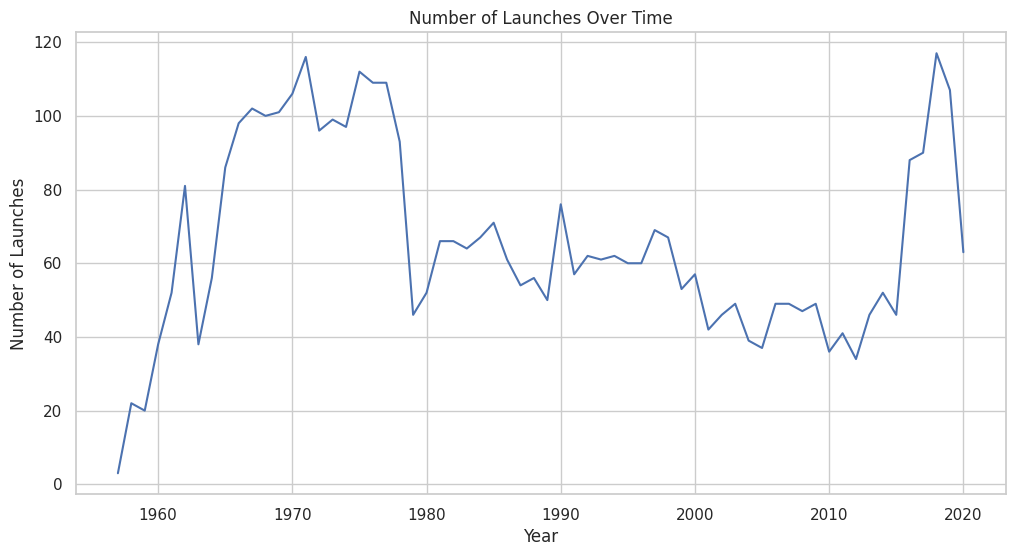

In [ ]:
# Import the required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a white grid style for Seaborn plots to enhance readability
sns.set(style="whitegrid")

# Group the DataFrame by the 'Year' column and count the number of launches (entries) per year
launches_by_year = df.groupby('Year')['Organisation'].count()

# Create a new figure with specified size (12 inches by 6 inches)
plt.figure(figsize=(12, 6))

# Plot a line chart using the years (index) and the number of launches (values)
plt.plot(launches_by_year.index, launches_by_year.values)

# Add a label to the x-axis
plt.xlabel('Year')

# Add a label to the y-axis
plt.ylabel('Number of Launches')

# Add a title to the plot
plt.title('Number of Launches Over Time')

# Enable gridlines for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()


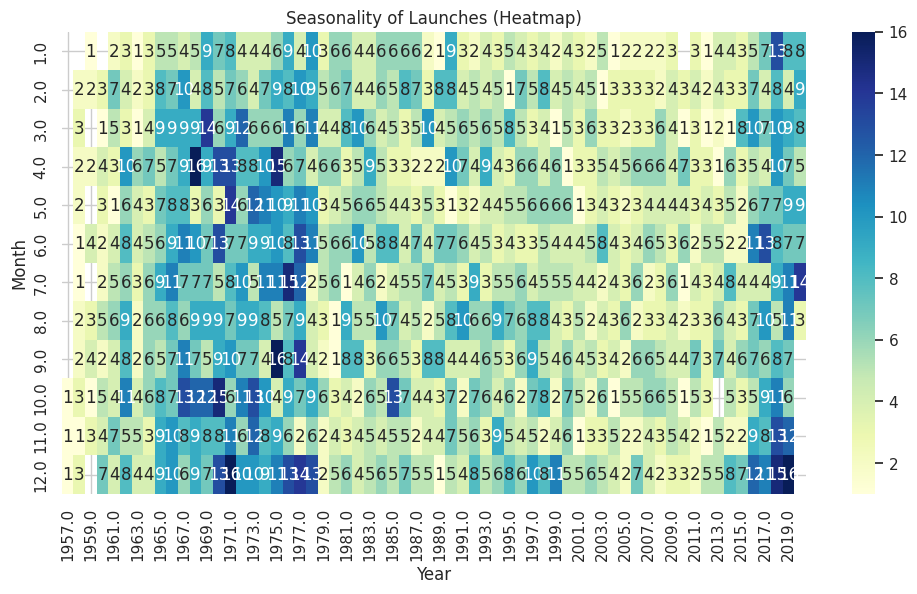

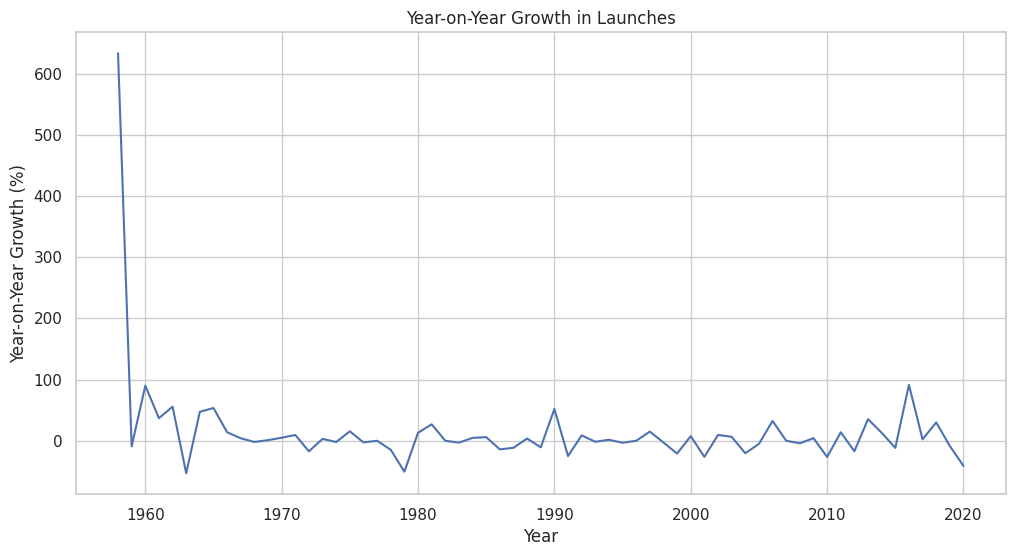

In [ ]:
# Group the DataFrame by 'Year' and 'Month', counting the number of entries in the 'Organisation' column
launches_by_month = df.groupby(['Year', 'Month'])['Organisation'].count().reset_index()

# Pivot the grouped data to create a table with 'Month' as rows, 'Year' as columns, and counts as values
launches_pivot = launches_by_month.pivot(index='Month', columns='Year', values='Organisation')

# Create a new figure with specified size (12 inches by 6 inches)
plt.figure(figsize=(12, 6))

# Create a heatmap to visualize the pivot table, with values annotated and a colormap of "YlGnBu"
sns.heatmap(launches_pivot, annot=True, fmt="g", cmap="YlGnBu")

# Add a title to the heatmap
plt.title('Seasonality of Launches (Heatmap)')

# Add a label to the x-axis
plt.xlabel('Year')

# Add a label to the y-axis
plt.ylabel('Month')

# Display the heatmap
plt.show()

# Group the DataFrame by 'Year', counting the number of entries in the 'Organisation' column
yearly_launches = df.groupby('Year')['Organisation'].count()

# Calculate the year-on-year percentage growth and multiply by 100 to express it as a percentage
year_on_year_growth = yearly_launches.pct_change() * 100

# Create a new figure with specified size (12 inches by 6 inches)
plt.figure(figsize=(12, 6))

# Plot the year-on-year growth values as a line chart, skipping the first year (NaN from pct_change)
plt.plot(year_on_year_growth.index[1:], year_on_year_growth.values[1:])

# Add a label to the x-axis
plt.xlabel('Year')

# Add a label to the y-axis
plt.ylabel('Year-on-Year Growth (%)')

# Add a title to the line chart
plt.title('Year-on-Year Growth in Launches')

# Enable gridlines for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()


***Mission Success Rates***

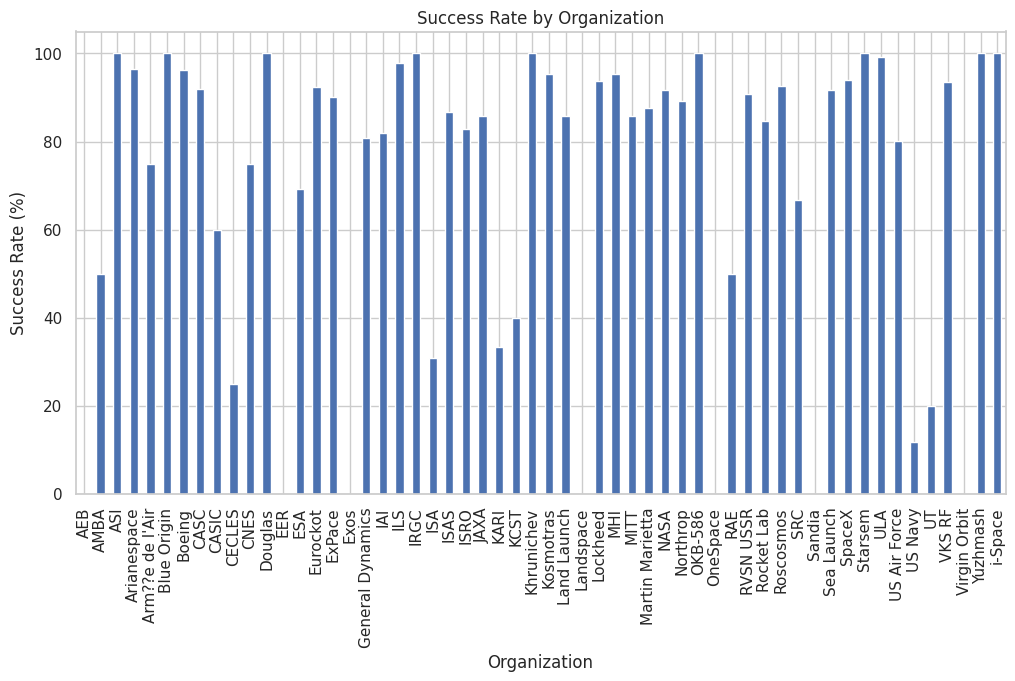

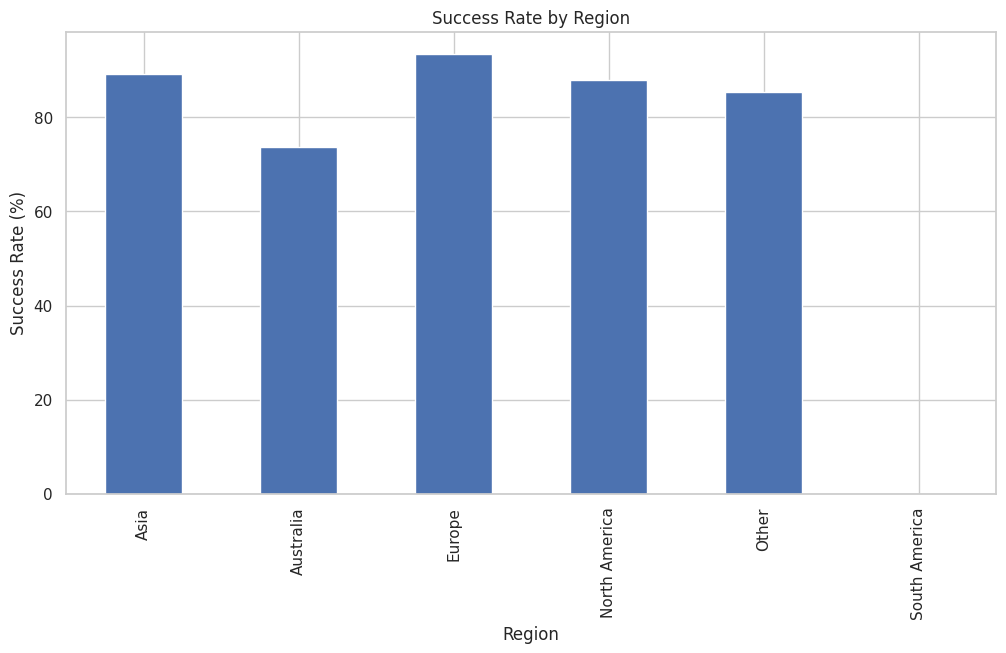

In [ ]:
# Plot the success rate ('Success') for each organization as a bar chart
success_rate_by_org['Success'].plot(kind='bar', figsize=(12,6))

# Add a title to the plot
plt.title('Success Rate by Organization')

# Add a label to the y-axis
plt.ylabel('Success Rate (%)')

# Add a label to the x-axis
plt.xlabel('Organization')

# Display the plot
plt.show()

# Plot the success rate ('Success') for each region as a bar chart
success_rate_by_region['Success'].plot(kind='bar', figsize=(12,6))

# Add a title to the plot
plt.title('Success Rate by Region')

# Add a label to the y-axis
plt.ylabel('Success Rate (%)')

# Add a label to the x-axis
plt.xlabel('Region')

# Display the plot
plt.show()


***Cost Analysis***

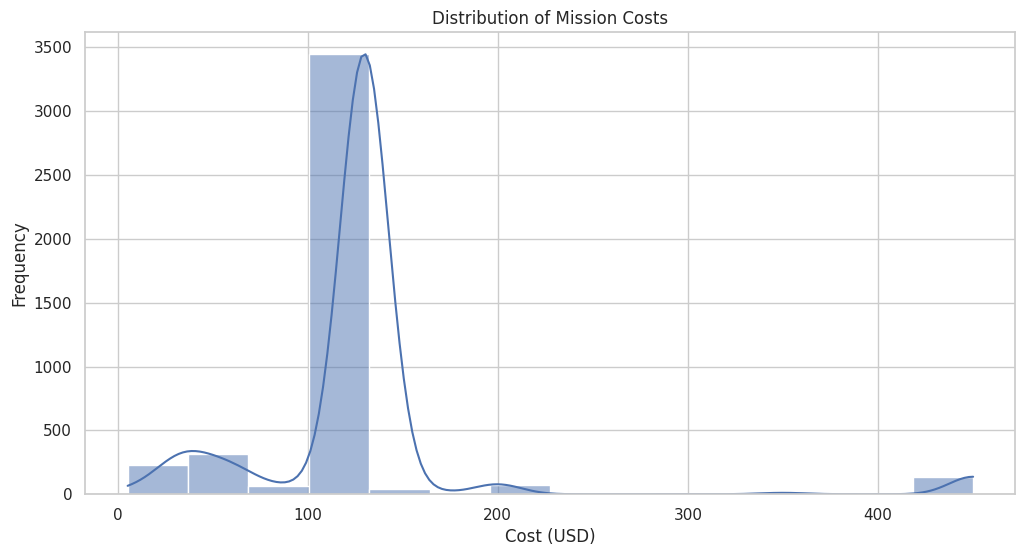

In [ ]:
# Create a histogram with a Kernel Density Estimate (KDE) overlay to visualize the distribution of mission costs
plt.figure(figsize=(12, 6))
sns.histplot(df['Imputed Price'], kde=True)

# Add a title to the histogram
plt.title('Distribution of Mission Costs')

# Label the x-axis
plt.xlabel('Cost (USD)')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()


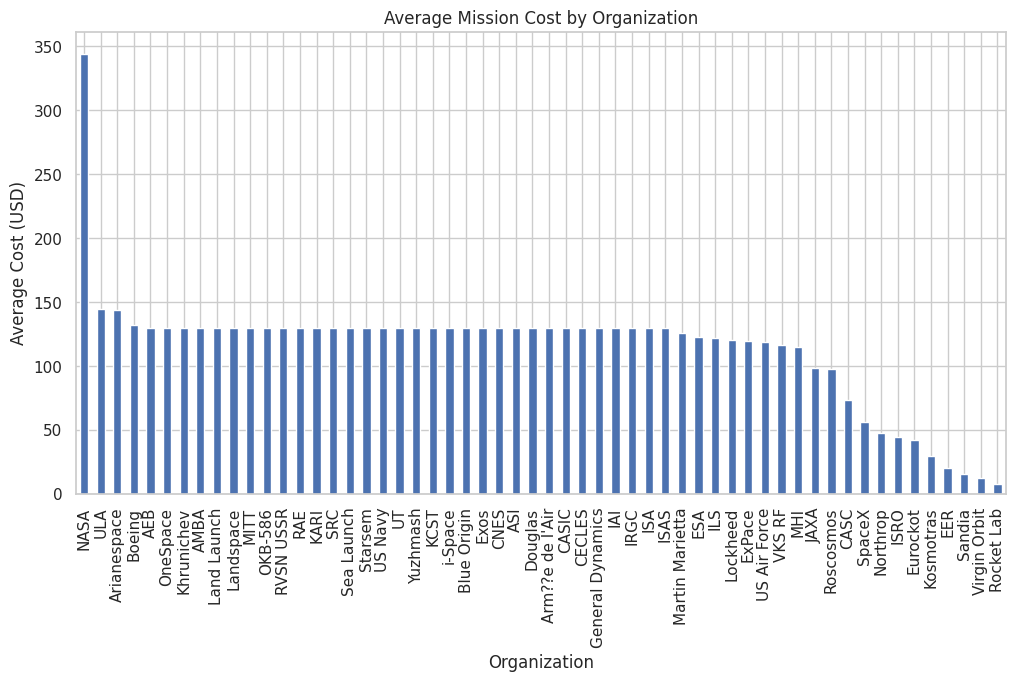

In [ ]:
# Calculate the average mission cost for each organization and sort in descending order
cost_by_org = df.groupby('Organisation')['Imputed Price'].mean().sort_values(ascending=False)

# Create a bar chart of the average mission cost by organization
plt.figure(figsize=(12, 6))
cost_by_org.plot(kind='bar')

# Add a title to the bar chart
plt.title('Average Mission Cost by Organization')

# Label the x-axis
plt.xlabel('Organization')

# Label the y-axis
plt.ylabel('Average Cost (USD)')

# Display the plot
plt.show()


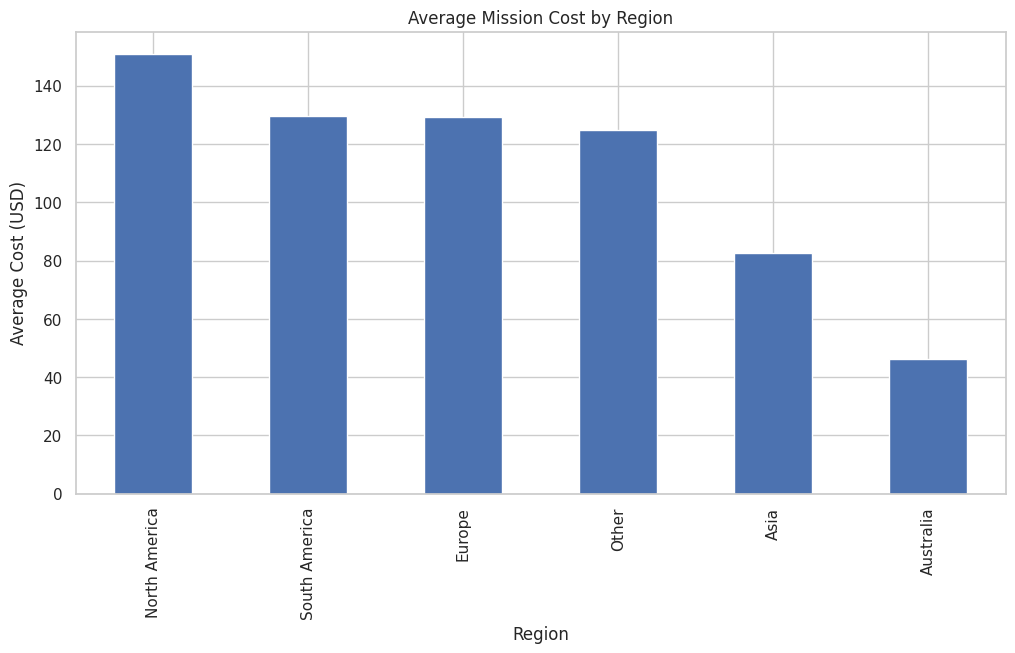

In [ ]:
# Calculate the average mission cost for each region and sort in descending order
cost_by_region = df.groupby('Region')['Imputed Price'].mean().sort_values(ascending=False)

# Create a bar chart of the average mission cost by region
plt.figure(figsize=(12, 6))
cost_by_region.plot(kind='bar')

# Add a title to the bar chart
plt.title('Average Mission Cost by Region')

# Label the x-axis
plt.xlabel('Region')

# Label the y-axis
plt.ylabel('Average Cost (USD)')

# Display the plot
plt.show()


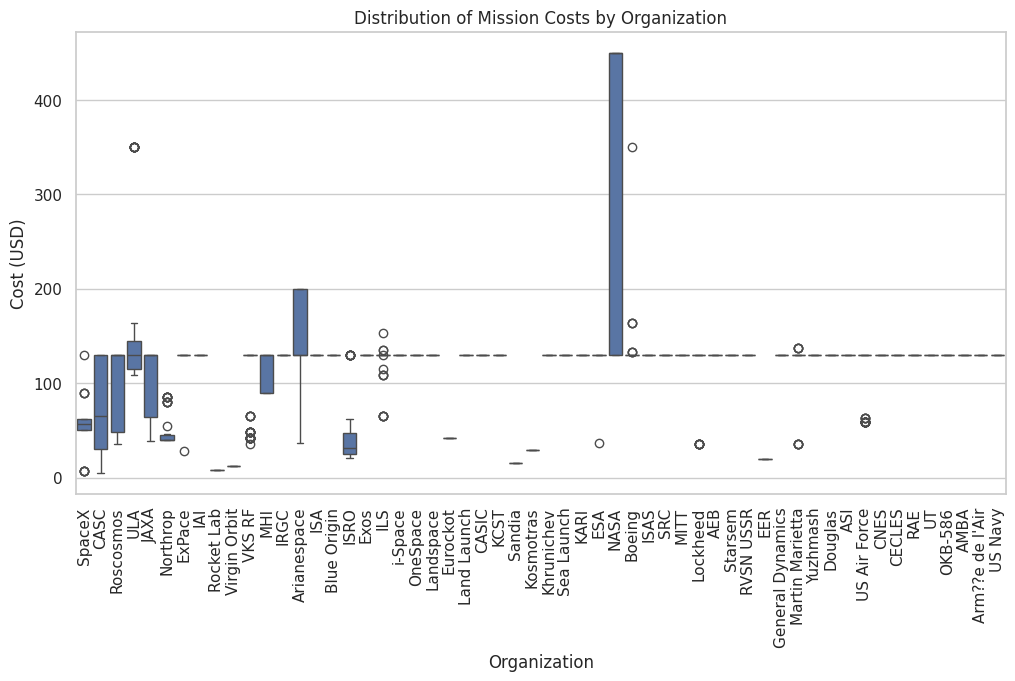

In [ ]:
# Create a boxplot of mission costs for each organization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Organisation', y='Imputed Price', data=df)

# Add a title to the boxplot
plt.title('Distribution of Mission Costs by Organization')

# Label the x-axis
plt.xlabel('Organization')

# Label the y-axis
plt.ylabel('Cost (USD)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


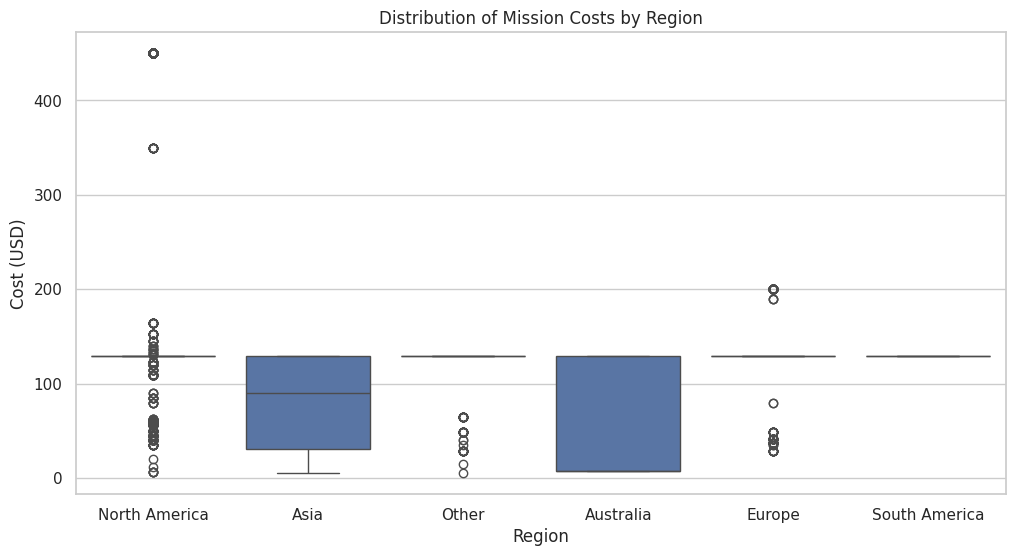

In [ ]:
# Create a boxplot of mission costs for each region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Imputed Price', data=df)

# Add a title to the boxplot
plt.title('Distribution of Mission Costs by Region')

# Label the x-axis
plt.xlabel('Region')

# Label the y-axis
plt.ylabel('Cost (USD)')

# Display the plot
plt.show()


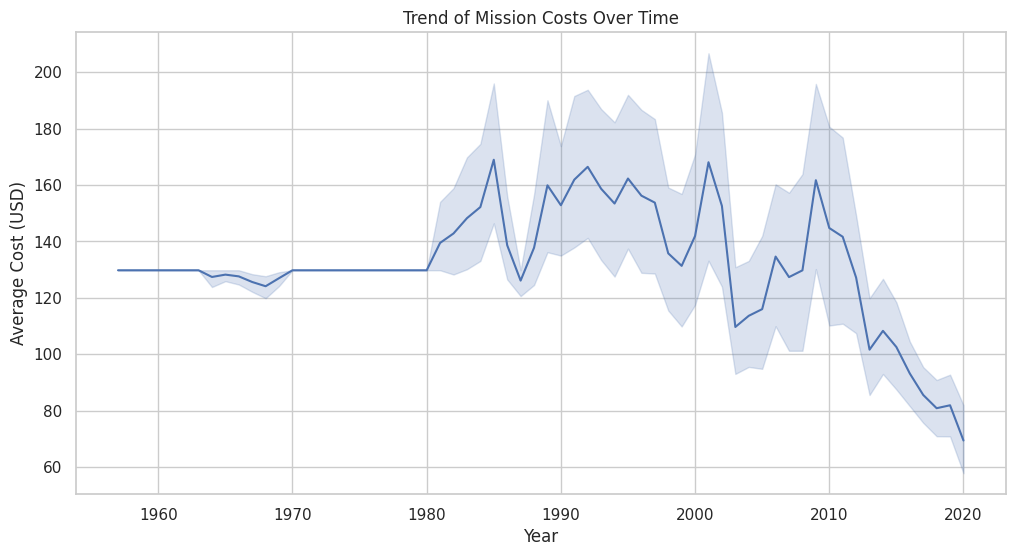

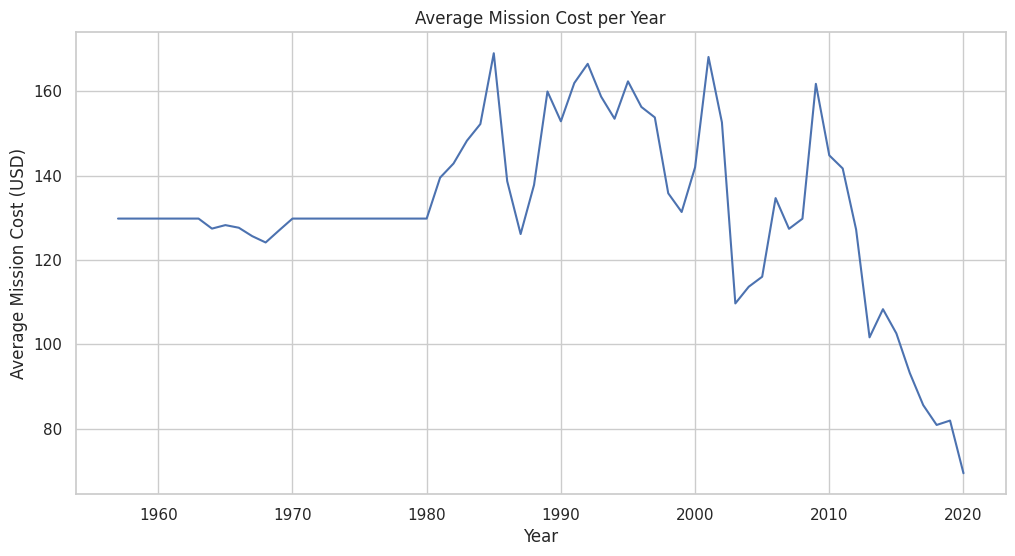

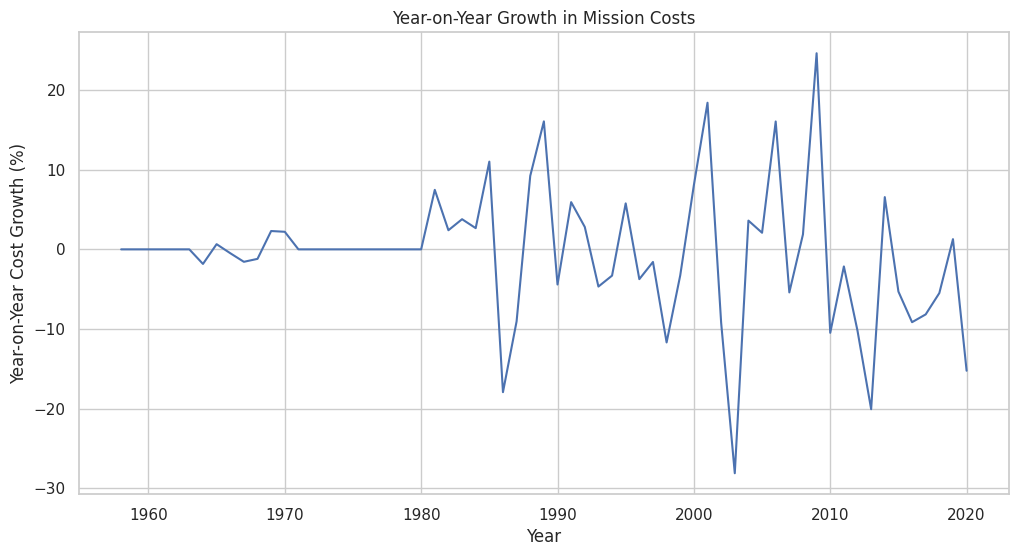

In [ ]:
# Create a line plot to visualize mission costs over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Imputed Price', data=df)

# Add a title to the line plot
plt.title('Trend of Mission Costs Over Time')

# Label the x-axis
plt.xlabel('Year')

# Label the y-axis
plt.ylabel('Average Cost (USD)')

# Display the plot
plt.show()


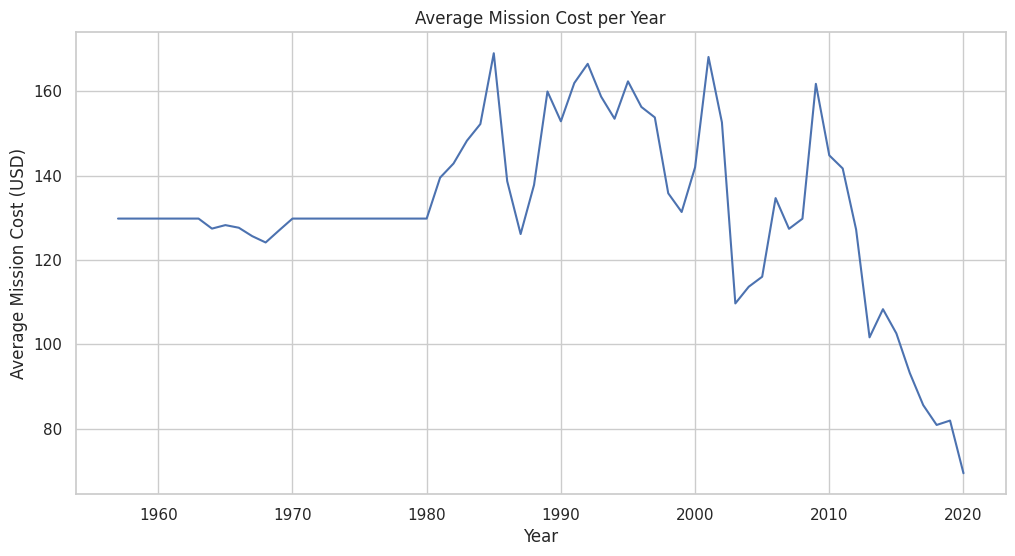

In [ ]:
# Group the data by 'Year' and calculate the average mission cost
yearly_cost = df.groupby('Year')['Imputed Price'].mean()

# Create a line plot to visualize the yearly average mission cost
plt.figure(figsize=(12, 6))
plt.plot(yearly_cost.index, yearly_cost.values)

# Label the x-axis
plt.xlabel('Year')

# Label the y-axis
plt.ylabel('Average Mission Cost (USD)')

# Add a title to the line plot
plt.title('Average Mission Cost per Year')

# Enable gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()


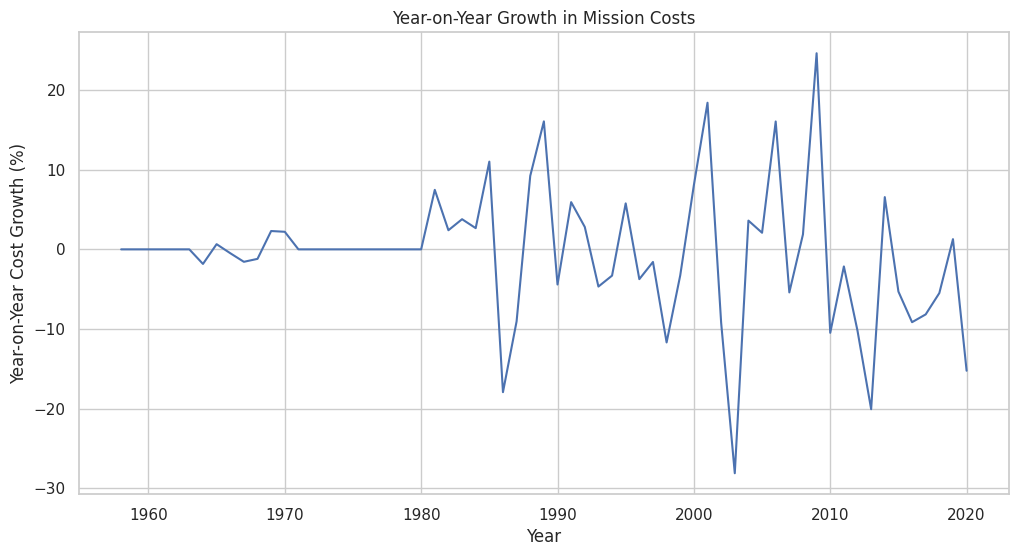

In [ ]:
# Calculate the year-on-year percentage growth in mission costs
year_on_year_cost_growth = yearly_cost.pct_change() * 100

# Create a line plot to visualize year-on-year cost growth
plt.figure(figsize=(12, 6))
plt.plot(year_on_year_cost_growth.index[1:], year_on_year_cost_growth.values[1:])

# Label the x-axis
plt.xlabel('Year')

# Label the y-axis
plt.ylabel('Year-on-Year Cost Growth (%)')

# Add a title to the line plot
plt.title('Year-on-Year Growth in Mission Costs')

# Enable gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()


***Rocket Status Impact***

Rocket_Status_StatusActive column not found.


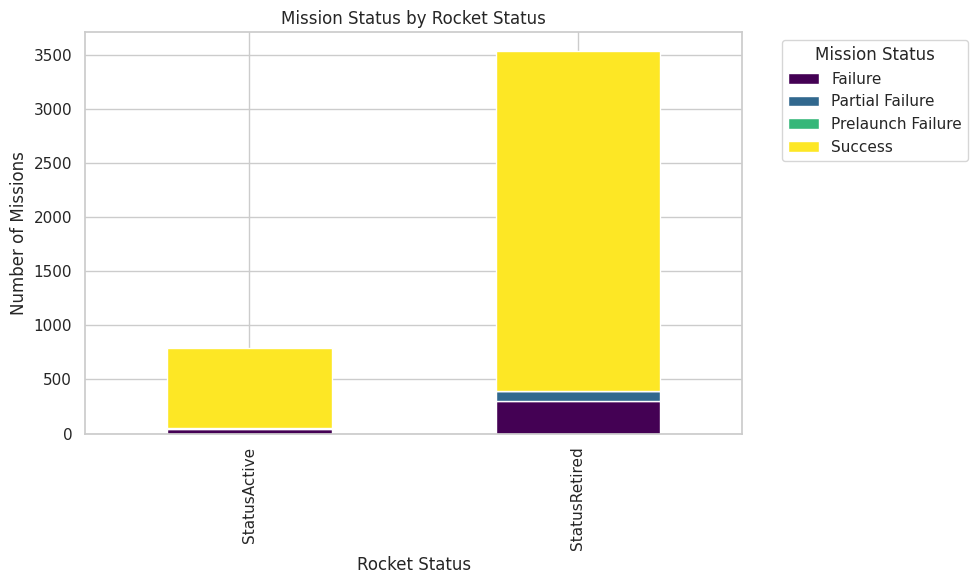

In [ ]:
# Map the 'Mission_Status' column to numeric values for correlation analysis
# 'Success' is mapped to 1, and 'Failure' is mapped to 0
df['Mission_Status_Numeric'] = df['Mission_Status'].map({'Success': 1, 'Failure': 0})

# Check if the 'Rocket_Status_StatusActive' column exists in the DataFrame
if 'Rocket_Status_StatusActive' in df.columns:
    # Calculate the Pearson correlation coefficient between 'Rocket_Status_StatusActive' and 'Mission_Status_Numeric'
    correlation = df['Rocket_Status_StatusActive'].corr(df['Mission_Status_Numeric'])

    # Print the correlation value
    print(f"Correlation between Rocket Status (StatusActive) and Mission Success: {correlation}")
else:
    # If the column is not found, print an informative message
    print("Rocket_Status_StatusActive column not found.")

# Group the DataFrame by the 'Rocket_Status' column and count occurrences of each 'Mission_Status' value
status_success_counts = (
    df.groupby('Rocket_Status')['Mission_Status']  # Group data by 'Rocket_Status'
    .value_counts(normalize=False)  # Count the number of occurrences of each 'Mission_Status' (raw counts, not normalized)
    .unstack(fill_value=0)  # Convert the result to a DataFrame where each 'Mission_Status' is a column; fill missing values with 0
)

status_success_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add title and labels
plt.title('Mission Status by Rocket Status')
plt.xlabel('Rocket Status')
plt.ylabel('Number of Missions')

# Add legend with a title, positioning it outside the plot area
plt.legend(title='Mission Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()


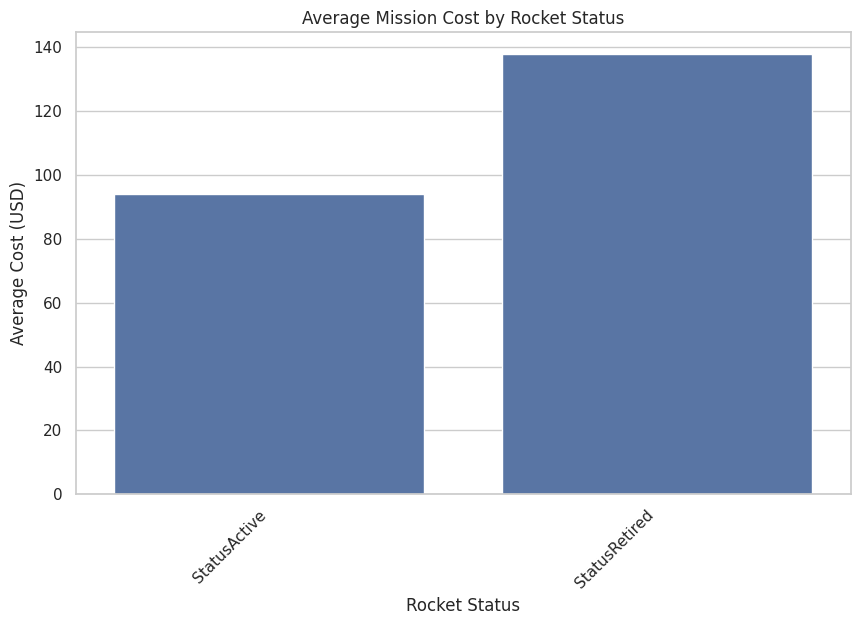

In [ ]:
# Group the DataFrame by 'Rocket_Status' and calculate the average mission cost ('Imputed Price') for each group
cost_by_rocket_status = df.groupby('Rocket_Status')['Imputed Price'].mean()

# Create a new figure for the bar plot with specified size (10 inches by 6 inches)
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn to visualize the average mission cost by rocket status
sns.barplot(x=cost_by_rocket_status.index, y=cost_by_rocket_status.values)

# Add a title to the bar plot
plt.title('Average Mission Cost by Rocket Status')

# Label the x-axis
plt.xlabel('Rocket Status')

# Label the y-axis
plt.ylabel('Average Cost (USD)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

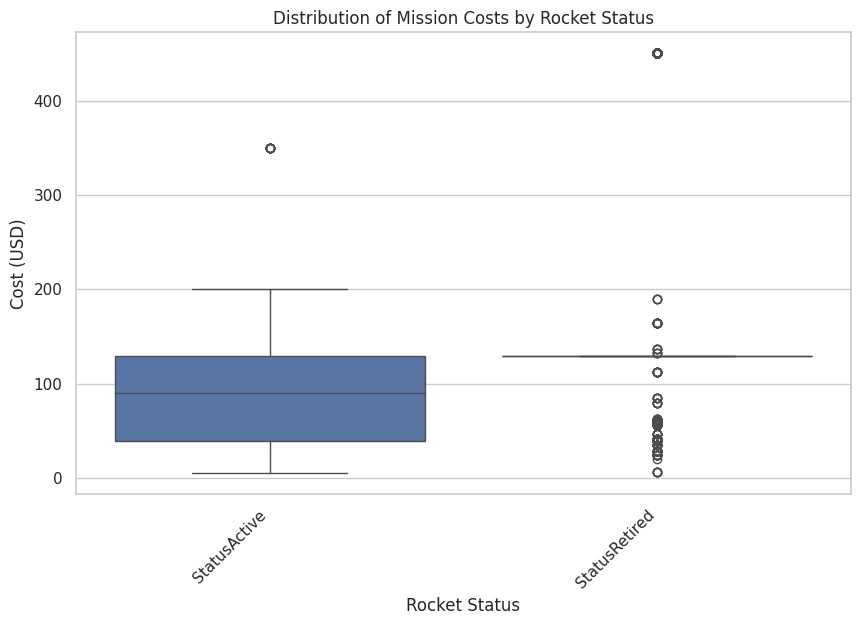

In [ ]:
# Create a new figure for the box plot with specified size (10 inches by 6 inches)
plt.figure(figsize=(10, 6))

# Create a boxplot using Seaborn to visualize the distribution of mission costs for each rocket status
sns.boxplot(x='Rocket_Status', y='Imputed Price', data=df)

# Add a title to the box plot
plt.title('Distribution of Mission Costs by Rocket Status')

# Label the x-axis
plt.xlabel('Rocket Status')

# Label the y-axis
plt.ylabel('Cost (USD)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


***Phase 4: Statistical Analysis***

***Correlation Analysis***

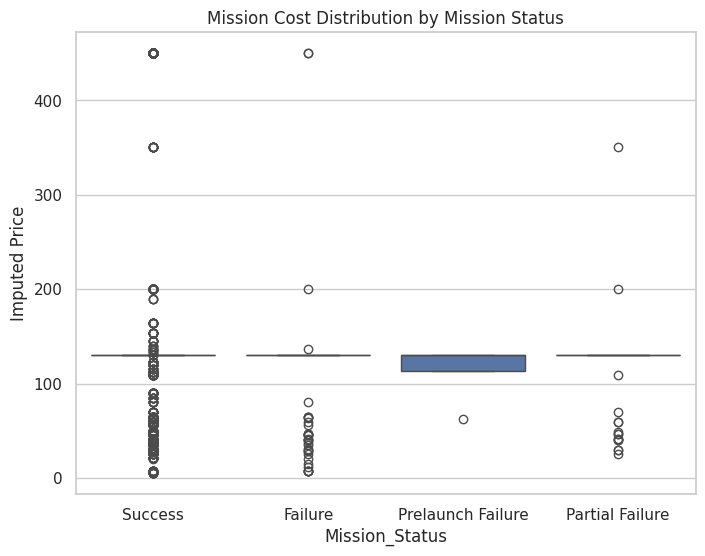

Correlation between Mission Success and Cost: 0.02992454557401043
Mission_Status     Failure  Partial Failure  Prelaunch Failure     Success
Rocket_Status                                                             
StatusActive     88.710634       124.220879         129.795237   93.602054
StatusRetired   127.643940       121.176618          95.897619  139.274458


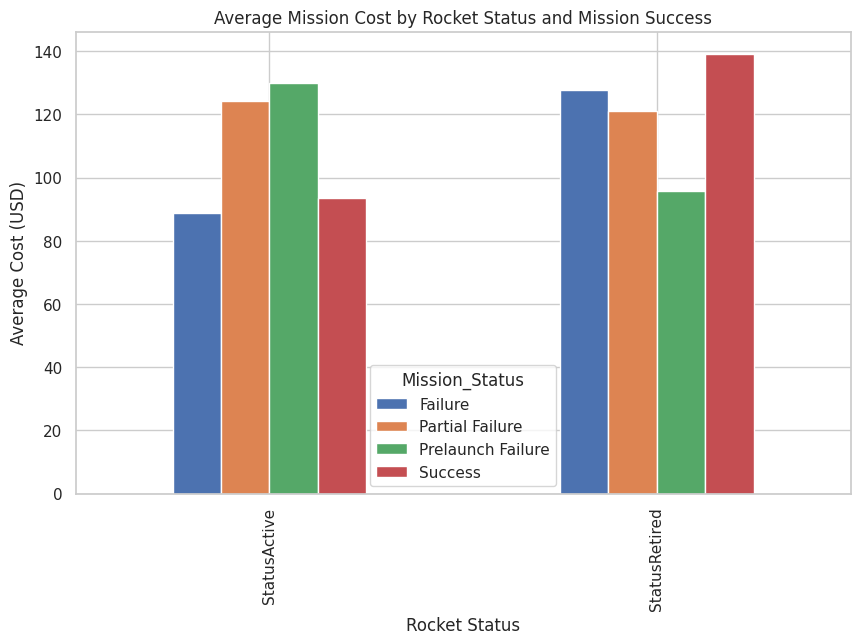

In [ ]:
plt.figure(figsize=(8, 6))  # Create a new figure with specified size (8 inches by 6 inches)
sns.boxplot(x='Mission_Status', y='Imputed Price', data=df)  # Create a boxplot of mission costs grouped by mission status
plt.title('Mission Cost Distribution by Mission Status')  # Add a title to the plot
plt.show()  # Display the plot

correlation = df['Mission_Status_Numeric'].corr(df['Imputed Price'])  # Calculate Pearson correlation between mission success and cost
print(f"Correlation between Mission Success and Cost: {correlation}")  # Print the correlation value

mission_cost_by_status = df.groupby(['Rocket_Status', 'Mission_Status'])['Imputed Price'].mean().unstack()
print(mission_cost_by_status)  # Print the resulting table

mission_cost_by_status.plot(kind='bar', figsize=(10, 6))  # Create a bar plot to visualize the data
plt.title('Average Mission Cost by Rocket Status and Mission Success')  # Add a title to the plot
plt.xlabel('Rocket Status')  # Label the x-axis
plt.ylabel('Average Cost (USD)')  # Label the y-axis
plt.show()  # Display the plot


In [ ]:
pearson_corr = df['Mission_Status_Numeric'].corr(df['Imputed Price'], method='pearson')  # Calculate Pearson correlation
print(f"Pearson correlation between Mission Success and Cost: {pearson_corr}")  # Print the Pearson correlation value

spearman_corr = df['Mission_Status_Numeric'].corr(df['Imputed Price'], method='spearman')  # Calculate Spearman correlation
print(f"Spearman correlation between Mission Success and Cost: {spearman_corr}")  # Print the Spearman correlation value


Pearson correlation between Mission Success and Cost: 0.02992454557401043
Spearman correlation between Mission Success and Cost: -0.006831395476252129


***Hypothesis Testing***

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table for Location and Mission Status
location_mission_table = pd.crosstab(df['Location'], df['Mission_Status'])

# Perform chi-square test for Location
chi2_location, p_location, dof_location, expected_location = chi2_contingency(location_mission_table)
print(f"Chi-square test for Location:\nChi2: {chi2_location}, p-value: {p_location}")

# Contingency table for Organization and Mission Status
org_mission_table = pd.crosstab(df['Organisation'], df['Mission_Status'])

# Perform chi-square test for Organization
chi2_org, p_org, dof_org, expected_org = chi2_contingency(org_mission_table)
print(f"Chi-square test for Organization:\nChi2: {chi2_org}, p-value: {p_org}")

# Interpret the results
alpha = 0.05  # Significance level

print("\nHypothesis Test Results:")
if p_location < alpha:
    print("Location significantly impacts mission success rates.")
else:
    print("Location does not significantly impact mission success rates.")

if p_org < alpha:
    print("Organization significantly impacts mission success rates.")
else:
    print("Organization does not significantly impact mission success rates.")

Chi-square test for Location:
Chi2: 1480.2785333676047, p-value: 2.281500695292918e-121
Chi-square test for Organization:
Chi2: 1077.5349179930292, p-value: 9.485957153679582e-134

Hypothesis Test Results:
Location significantly impacts mission success rates.
Organization significantly impacts mission success rates.


In [ ]:
from scipy.stats import ttest_ind

# Separate costs for successful and failed missions
successful_missions_costs = df[df['Mission_Status'] == 'Success']['Imputed Price']
failed_missions_costs = df[df['Mission_Status'] == 'Failure']['Imputed Price']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(successful_missions_costs, failed_missions_costs)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in costs between successful and failed missions.")
else:
    print("There is no statistically significant difference in costs between successful and failed missions.")

T-statistic: 1.943893210705122
P-value: 0.051974774896878025
There is no statistically significant difference in costs between successful and failed missions.


***Phase 5: Geospatial Analysis***

***Map Visualization***

In [ ]:
import pandas as pd
import plotly.express as px

region_mission_counts = df.groupby('Region')['Mission_Status'].value_counts().unstack(fill_value=0)

# Calculate success rate
region_mission_counts['Success Rate'] = (
    region_mission_counts['Success'] /
    (region_mission_counts['Success'] + region_mission_counts['Failure'])
)

# Add latitude and longitude for continents (manual input)
continent_coords = {
    'North America': {'lat': 40.7128, 'lon': -100.0059},
    'Asia': {'lat': 34.0479, 'lon': 100.6197},
    'Other': {'lat': 0.0, 'lon': 0.0},  # Example for placeholder
    'Australia': {'lat': -25.2744, 'lon': 133.7751},
    'Europe': {'lat': 54.5260, 'lon': 15.2551},
    'South America': {'lat': -14.2350, 'lon': -51.9253},
}

# Add coordinates to the DataFrame
region_mission_counts['Latitude'] = region_mission_counts.index.map(lambda x: continent_coords[x]['lat'])
region_mission_counts['Longitude'] = region_mission_counts.index.map(lambda x: continent_coords[x]['lon'])

# Reset index for Plotly
region_mission_counts = region_mission_counts.reset_index()

# Create a scattergeo plot
fig = px.scatter_geo(
    region_mission_counts,
    lat='Latitude',
    lon='Longitude',
    size='Success',
    color='Success Rate',
    hover_name='Region',
    hover_data=['Success', 'Failure', 'Success Rate'],
    title='Mission Success by Region (Continent-Level)',
    projection='natural earth'
)

fig.show()


***Phase 6: Predictive Modelling***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data for the model
features = ['Year', 'Month', 'Imputed Price', 'Mission_Status_Numeric']  # Add other relevant features if needed
X = df[features].dropna()  # Drop rows with missing values
y = X['Mission_Status_Numeric']
X = X.drop('Mission_Status_Numeric', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9218559218559218
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.92      1.00      0.96       755

    accuracy                           0.92       819
   macro avg       0.46      0.50      0.48       819
weighted avg       0.85      0.92      0.88       819



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



***Phase 7: Visualization***

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Get predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of success

# Create a DataFrame for visualization
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted Probability': y_pred_proba})


# Interactive scatter plot
fig_predictions = px.scatter(prediction_df,
                             x='Predicted Probability',
                             y='Actual',
                             title='Success Prediction Model Outcomes',
                             labels={'Predicted Probability': 'Predicted Probability of Success', 'Actual': 'Actual Mission Status'},
                             hover_data=['Predicted Probability', 'Actual'])
fig_predictions.show()


# Example using a histogram to visualize predicted probabilities:
fig_hist = px.histogram(prediction_df, x="Predicted Probability", color="Actual", marginal="rug",
                        title="Distribution of Predicted Probabilities",
                        labels={"Predicted Probability": "Predicted Probability of Success",
                                "count": "Number of Missions"})
fig_hist.show()